In [1]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#Import csv into Colab before running
df_market_data = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


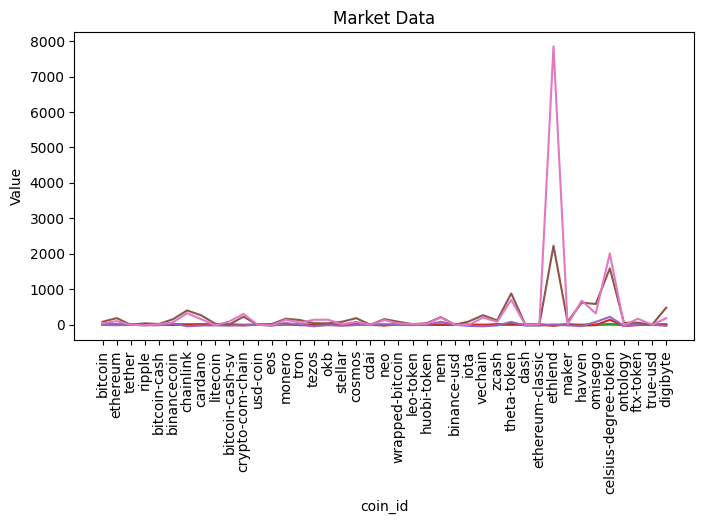

In [4]:
# Plot your data to see what's in your DataFrame
plt.figure(figsize=(8, 4))
plt.plot(df_market_data.index, df_market_data.values)  # Plot the data
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.xlabel('coin_id')  # Set x-axis label
plt.ylabel('Value')  # Set y-axis label
plt.title('Market Data')  # Set plot title
plt.show()  # Show the plot

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
crypto_data_scaled = StandardScaler().fit_transform(
    df_market_data[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d",
                    "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]]
)

In [6]:
# Create a DataFrame with the scaled data
df_crypto_scaled = pd.DataFrame(
    crypto_data_scaled,
    columns = ["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d",
                    "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]
)

# Copy the crypto names from the original data
df_crypto_scaled["Coin ID"] = df_market_data.index
# Set the coinid column as index
df_crypto_scaled = df_crypto_scaled.set_index("Coin ID")

# Display sample data
df_crypto_scaled.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
Coin ID,,,,,,,
nem,-0.217984,-0.849381,0.297632,-0.199820,1.773127,-0.047361,-0.119226
crypto-com-chain,0.331280,-1.614844,-1.054521,-0.729931,-0.350155,-0.022866,-0.034570
digibyte,1.217453,-0.607714,-0.907066,0.449939,-0.662530,0.572367,-0.132482
dash,-0.296940,0.094763,0.040040,-0.358830,-0.558527,-0.535732,-0.284071
omisego,1.919812,0.370447,-1.619761,-0.409716,1.696480,0.811207,-0.021888
okb,-0.923203,-1.437359,-0.629963,-0.460558,-0.058504,-0.457283,-0.166900
ftx-token,0.414711,0.414044,-0.047386,-0.465380,0.128185,-0.416502,-0.145469
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [8]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    # Create KMeans model with current value of k
    kmeans = KMeans(n_clusters=k)

    # Fit the model to the scaled data
    kmeans.fit(df_crypto_scaled)

    # Append the inertia value to the inertia_values list
    inertia_values.append(kmeans.inertia_)

# Display the inertia values
print(inertia_values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[287.0, 195.82021818036043, 123.19048183836958, 79.02243535120977, 65.28498528669093, 52.130291718768895, 43.926255991778106, 36.580834826847706, 32.76876235030064, 28.491723738208545, 23.773506363904353]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = []
for k, inertia in zip(k_values, inertia_values):
    # Append dictionary for each k and inertia pair
    elbow_data.append({"k": k, "inertia": inertia})

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.284985
5,6,52.130292
6,7,43.926256
7,8,36.580835
8,9,32.768762
9,10,28.491724


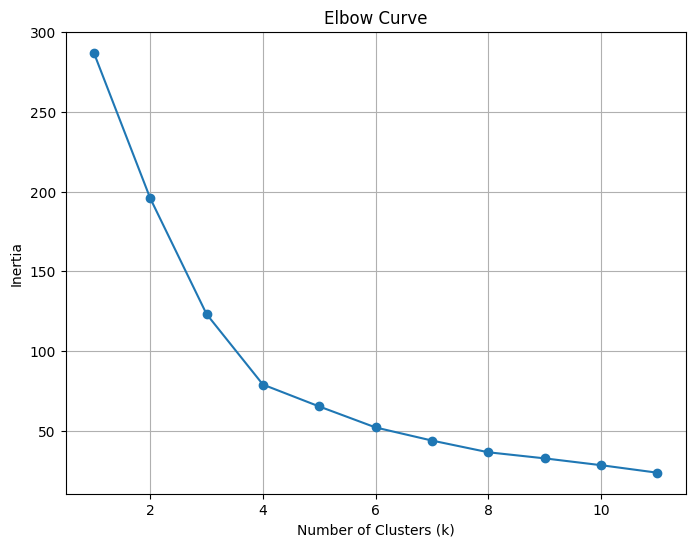

In [10]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [12]:
# Fit the K-Means model using the scaled data
model.fit(df_crypto_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = model.predict(df_crypto_scaled)

# Print the resulting array of cluster values.
print(k_4)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [14]:
# Create a copy of the DataFrame
crypto_prediction_df = df_crypto_scaled.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
crypto_prediction_df["Crypto_segments"] = k_4

# Display sample data
crypto_prediction_df.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Crypto_segments
Coin ID,,,,,,,,
neo,0.286546,-0.326301,-1.212670,-0.903134,0.290970,-0.181187,-0.175550,3
stellar,-0.277543,-0.385209,-0.153243,-0.371816,-0.656403,-0.353387,-0.270874,3
zcash,-0.127467,0.929119,0.677532,0.223834,-0.437068,-0.265163,-0.214829,0
monero,0.262723,1.792602,2.202665,1.437842,0.893865,-0.155893,-0.167644,0
ontology,-0.409044,-0.906963,-1.298986,-1.393153,-0.696937,-0.422835,-0.292344,3
ethereum-classic,-0.071312,-0.229484,-0.175544,0.051882,-0.551760,-0.526060,-0.273062,3
nem,-0.217984,-0.849381,0.297632,-0.199820,1.773127,-0.047361,-0.119226,3
leo-token,0.051758,-0.928381,-0.871918,0.058782,-0.159250,-0.512071,-0.265036,3
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0


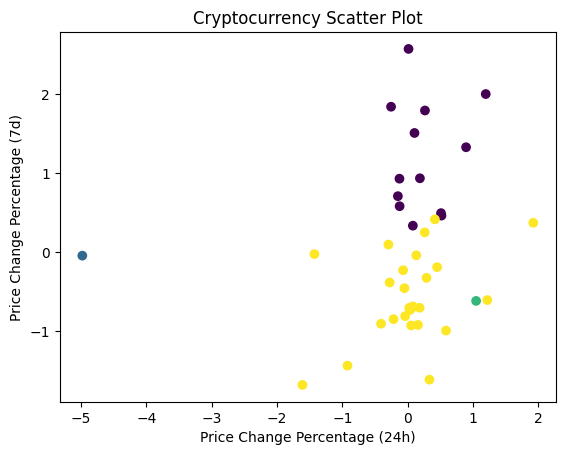

In [16]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and

plt.scatter(crypto_prediction_df['price_change_percentage_24h'],
            crypto_prediction_df['price_change_percentage_7d'],
            c=crypto_prediction_df['Crypto_segments'])


# Set labels and title
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.title('Cryptocurrency Scatter Plot')

# Show the plot
plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
crypto_pca = pca.fit_transform(df_crypto_scaled)
# View the first five rows of the DataFrame.
crypto_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [19]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.89503166 or about 90%

In [20]:
# Create a new DataFrame with the PCA data.
# Copy the crypto names from the original data
# Set the coinid column as index
crypto_pca_df = pd.DataFrame(data=crypto_pca, index=df_crypto_scaled.index, columns=['PC1', 'PC2', 'PC3'])

# Display sample data
crypto_pca_df.sample(10)

,PC1,PC2,PC3
Coin ID,,,
monero,0.060499,2.909404,1.498571
chainlink,-0.450711,0.517699,2.846143
bitcoin-cash-sv,-0.759014,-0.201200,-0.217653
binance-usd,-0.450211,-0.151019,-0.647401
cosmos,-0.306272,0.703415,1.714224
theta-token,2.676868,-0.013954,-1.965207
okb,0.064075,-1.269825,-1.098829
vechain,-0.556315,-1.938209,-1.261776
zcash,-0.425147,0.492976,1.058048


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [22]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    # Create KMeans model with current value of k
    kmeans = KMeans(n_clusters=k)

    # Fit the model to the scaled data
    kmeans.fit(crypto_pca_df)

    # Append the inertia value to the inertia_values list
    inertia_values.append(kmeans.inertia_)

# Display the inertia values
print(inertia_values)

[256.8740855678924, 165.90199402036004, 93.7746256805729, 49.665496651797355, 38.072792150143194, 27.72062619489979, 21.22969208672918, 17.091636643864742, 13.668117456693235, 10.484890485976916, 7.982863232319449]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [23]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = []
for k, inertia in zip(k_values, inertia_values):
    # Append dictionary for each k and inertia pair
    elbow_data_pca.append({"k": k, "inertia": inertia})

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)
print(df_elbow_pca)


     k     inertia
0    1  256.874086
1    2  165.901994
2    3   93.774626
3    4   49.665497
4    5   38.072792
5    6   27.720626
6    7   21.229692
7    8   17.091637
8    9   13.668117
9   10   10.484890
10  11    7.982863


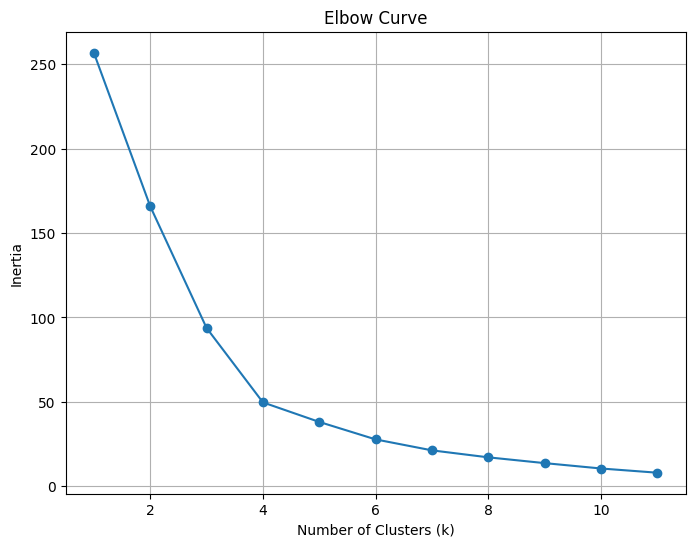

In [24]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [26]:
# Fit the K-Means model using the PCA data
model.fit(crypto_pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4 = model.predict(crypto_pca_df)
# Print the resulting array of cluster values.
print(k_4)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [28]:
# Create a copy of the DataFrame with the PCA data
crypto_pca_prediction_df = crypto_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
crypto_pca_prediction_df["PCA_segments"] = k_4
# Display sample data
crypto_pca_prediction_df.sample(10)

,PC1,PC2,PC3,PCA_segments
Coin ID,,,,
havven,0.865762,-2.261882,0.275583,3
dash,-0.613923,-0.479337,0.339565,3
huobi-token,-0.407483,-0.212507,-0.351426,3
ethlend,8.089018,-3.896891,2.301382,1
vechain,-0.556315,-1.938209,-1.261776,3
neo,-0.362120,-0.986914,-0.728752,3
omisego,0.111675,0.428316,-1.205398,3
litecoin,-0.649468,0.432165,0.600303,0
celsius-degree-token,4.792395,6.767679,-1.986985,2


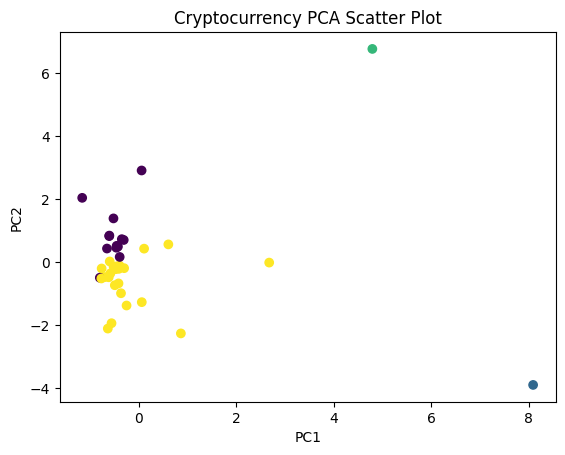

In [29]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
plt.scatter(crypto_pca_prediction_df['PC1'],
            crypto_pca_prediction_df['PC2'],
            c=crypto_pca_prediction_df['PCA_segments'])


# Set labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cryptocurrency PCA Scatter Plot')

# Show the plot
plt.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

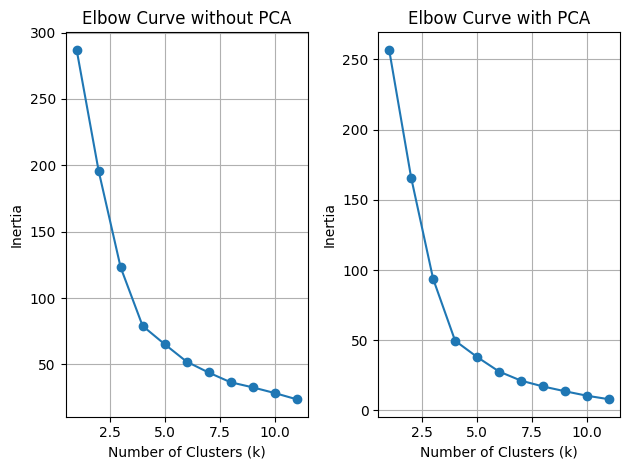

In [30]:
# Composite plot to contrast the Elbow curves

plt.subplot(1, 2, 1)
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve without PCA')
plt.grid(True)

# Plot Elbow Curve with PCA
plt.subplot(1, 2, 2)
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve with PCA')
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

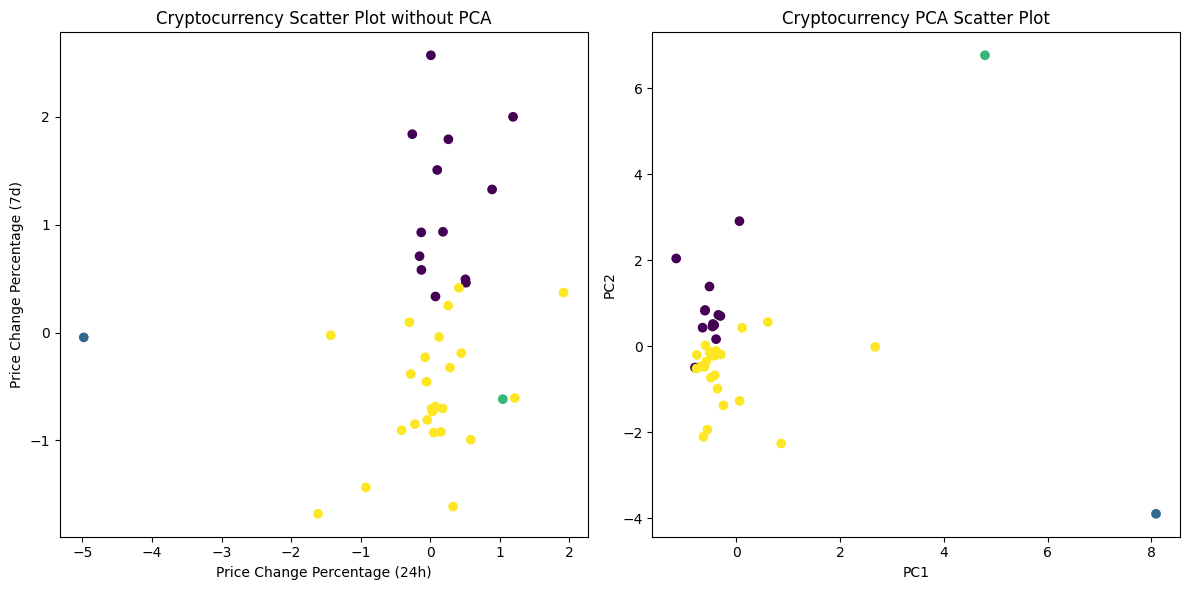

In [31]:
plt.figure(figsize=(12, 6))

# Plot Scatter Plot without PCA
plt.subplot(1, 2, 1)
plt.scatter(crypto_prediction_df['price_change_percentage_24h'], crypto_prediction_df['price_change_percentage_7d'], c=crypto_prediction_df['Crypto_segments'])
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.title('Cryptocurrency Scatter Plot without PCA')

# Plot Scatter Plot with PCA
plt.subplot(1, 2, 2)
plt.scatter(crypto_pca_prediction_df['PC1'], crypto_pca_prediction_df['PC2'], c=crypto_pca_prediction_df['PCA_segments'])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cryptocurrency PCA Scatter Plot')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The impact of using fewer features to cluster the data using K-means can help reduce complexity within the data, allowing for more clear readibility and interpretability. If the data set is quite a noisy set, it helps target underlying patterns that may not have been visible in the first place. The clusters before PCA are difficult to understand the patterns. We can see that clusters overlap quite a bit, and the trends are difficult to realise. After PCA, there are very clear and distinct clusters in the graph. We can easily identify the cases that are outliers and may need to be analysed, where in the before PCA graph, this is not as clear as to which outliers should be sent for analysis. Using fewer features however can affect the data by discarding potentially useful information used for clustering, and could result in less meaningful clusters.
